In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import the necessary libraries required 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt    # Digunakan untuk Visualisasi data
import seaborn as sns
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

#%matplotlib notebook
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


In [3]:
housing=pd.read_csv("/content/drive/MyDrive/California.csv")

In [4]:
print("Jumlah baris dan kolom adalah {} juga disebut bentuk matriks".format(housing.shape))
print("nama-nama colom \n {}".format(housing.columns))

Jumlah baris dan kolom adalah (20640, 10) juga disebut bentuk matriks
nama-nama colom 
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [5]:
#menampilkan 5 data teratas
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# menampilkan 5 data terbawah
print(housing.tail())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAN

In [7]:
# menampilkan tipe tipe data yang ada
print(housing.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


# **Mendapatkan nilai hilang**

In [8]:
# melihat colom mana yang memiliki data dengan nilai yang null
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
# mencetak mode dan deskripsi statistik pada kolom
print ("Total_bedrooms column Mode is  "+str(housing["total_bedrooms"].mode())+"\n")
print(housing["total_bedrooms"].describe())

Total_bedrooms column Mode is  0    280.0
dtype: float64

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64


In [10]:
# mencetak 5 baris pertama kolom pada indeks 4dari dataframe kemudian membuat instance kelas imputer untuk memasukan nilai yang hilang harus menjadi median
print(housing.iloc[:,4:5].head())
imputer = SimpleImputer(strategy='median')
imputer.fit(housing.iloc[:,4:5])
housing.iloc[:,4:5] = imputer.transform(housing.iloc[:,4:5])
housing.isnull().sum()

   total_bedrooms
0           129.0
1          1106.0
2           190.0
3           235.0
4           280.0


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# **Encoding Ocean Proximity**

In [11]:
#Merubah data yang dimana data ocean proximity sebelumnya merupakan nilai category menjadi str
labelEncoder = LabelEncoder()
print(housing["ocean_proximity"].value_counts())
housing["ocean_proximity"] = labelEncoder.fit_transform(housing["ocean_proximity"])
housing["ocean_proximity"].value_counts()
housing

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


# **Mendapatkan Nilai Outlier**

In [12]:
# mlihat data outlier dengan fungsi num_dist yang mengambil argumen data:sebuah dataframe dan var:string yang mewakili nama kolom di dataframe
def num_dist(data, var):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=data, x=var, kde=True, ax=ax[0])
    sns.boxplot(data=data, x=var, ax=ax[1])
    ax[0].set_title(f"{var} Distribution Histogram")
    ax[1].set_title(f"{var} Distribution Boxplot")

    plt.show()

In [13]:
# membuat daftar variabel numerik yang dapat digunakan nanti untuk memplotnya.
variable_numeric = housing.drop("ocean_proximity",axis=1)
num_var = [i for i in variable_numeric.columns]

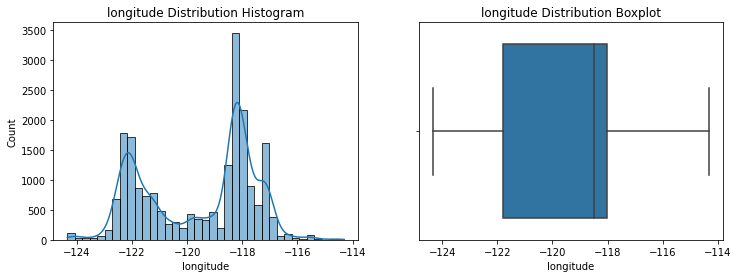

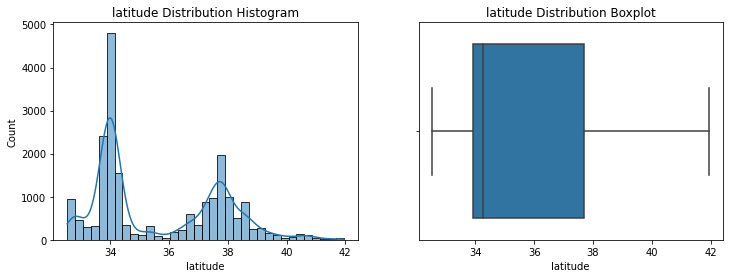

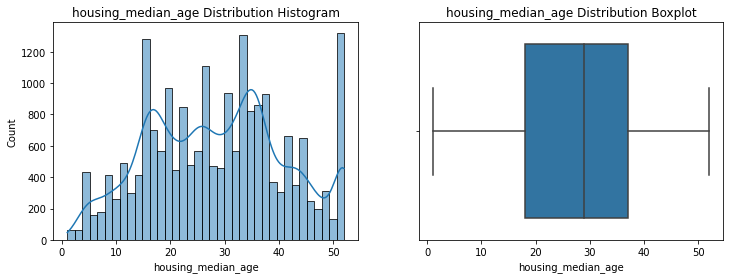

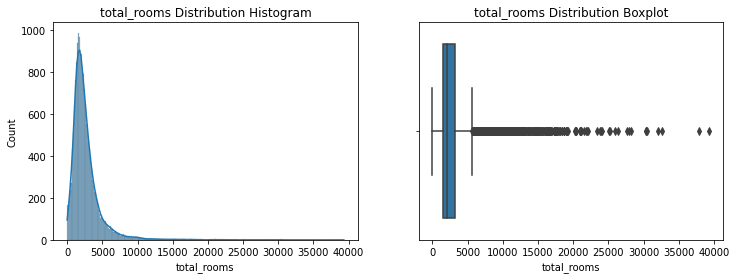

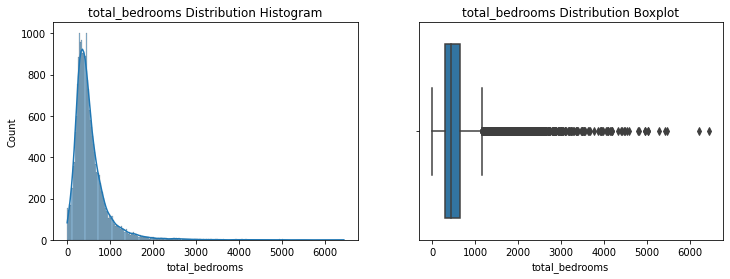

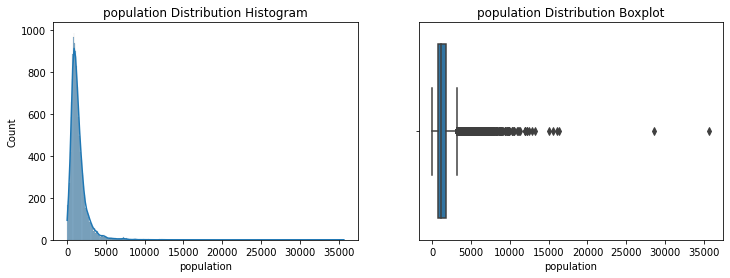

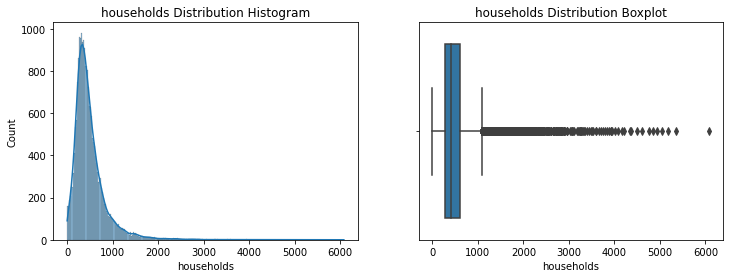

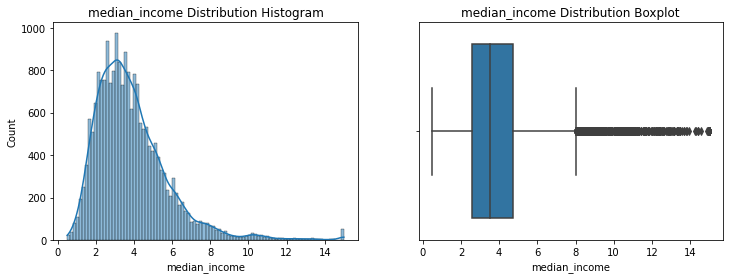

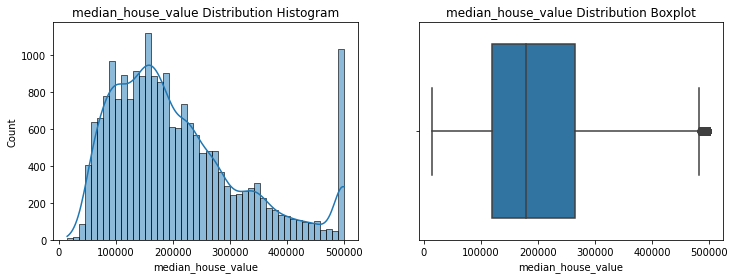

In [14]:
# membuat plot untuk melihat kolom mana saja yang memiliki outlier didalamnya
for num in num_var:
  num_dist(housing, num)

In [15]:
# membuat variable outlier_var dengan didalamnya berisikan kolom yang berisikan data outlier didalamnya.
outlier_var = ['total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']
print(outlier_var)

['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


"Threshold = 0.1" adalah nilai ambang batas (threshold) yang digunakan sebagai pembatas antara hasil yang dianggap benar dan salah. Nilai threshold ini sering digunakan dalam pemrosesan sinyal dan image processing, serta dalam sistem klasifikasi, seperti binary classification atau multi-class classification.

Kode di bawah adalah proses pembersihan data (data cleaning) untuk mengatasi outlier pada variabel yang ditentukan sebagai "outlier_var". Proses pembersihan data ini menggunakan lambda function yang digunakan untuk memotong (clip) nilai outlier pada data. Nilai threshold yang ditentukan sebagai 0.1 digunakan untuk memotong nilai outlier pada 10% data terbawah dan 10% data teratas.

Setelah itu, variabel yang telah dibersihkan dari outlier dilakukan logaritmasi. Logaritmasi akan membantu memperbaiki distribusi data yang tidak normal dan membuat data lebih baik untuk dianalisis.

Hasil dari proses ini akan menampilkan data yang telah dibersihkan dari outlier dan dilakukan logaritmasi.

In [16]:
threshold = 0.1
housing[outlier_var] = housing[outlier_var].apply(lambda x: x.clip(x.quantile(threshold), x.quantile(1-threshold)))
housing[outlier_var] = np.log(housing[outlier_var])
print(housing[outlier_var])

       total_rooms  total_bedrooms  population  households  median_income  \
0         6.846943        5.293305    6.234411    5.214936       1.817949   
1         8.444945        6.865995    7.783641    6.791221       1.817949   
2         7.290975        5.293305    6.234411    5.214936       1.817949   
3         7.149917        5.459586    6.324359    5.389072       1.730434   
4         7.394493        5.634790    6.336826    5.556828       1.347086   
...            ...             ...         ...         ...            ...   
20635     7.417580        5.924256    6.739337    5.799093       0.643852   
20636     6.846943        5.293305    6.234411    5.214936       0.938756   
20637     7.720462        6.184149    6.914731    6.070738       0.643852   
20638     7.528332        6.013715    6.608001    5.855072       0.643852   
20639     7.932003        6.423247    7.234898    6.272877       0.870707   

       median_house_value  
0               12.838939  
1               12.

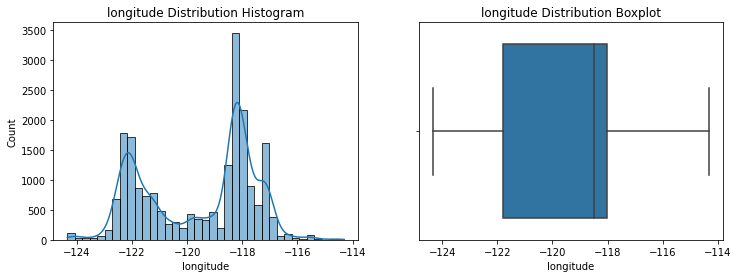

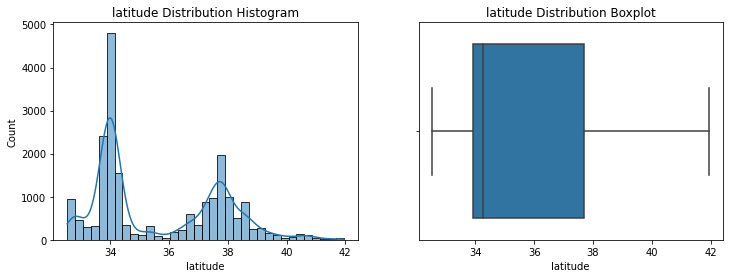

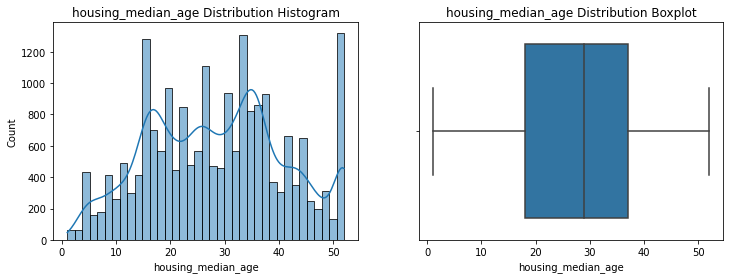

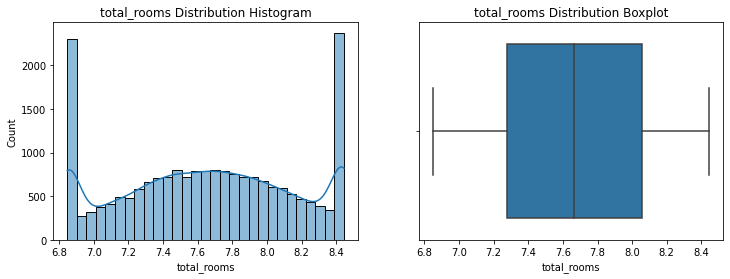

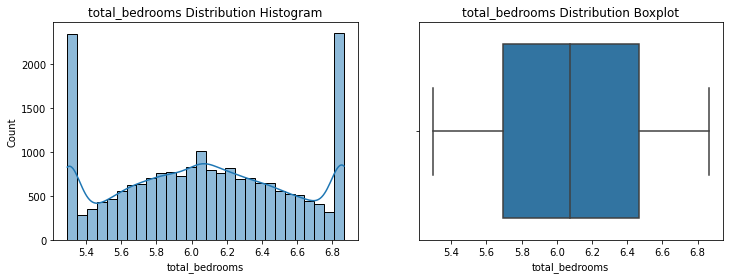

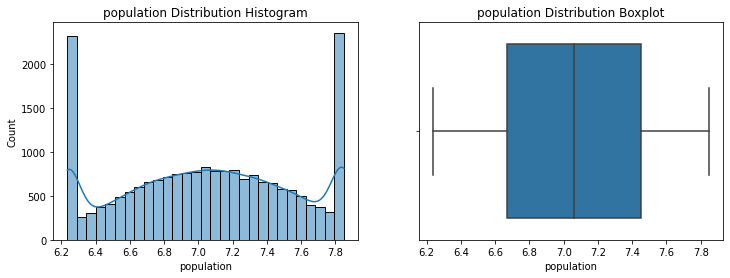

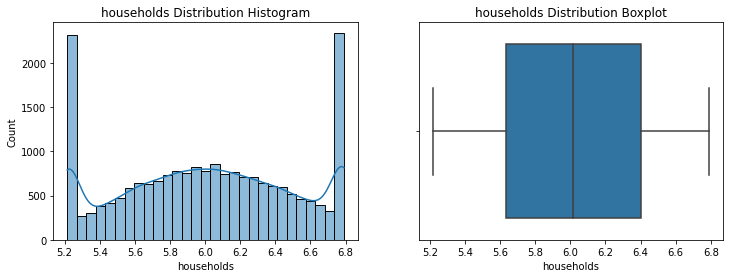

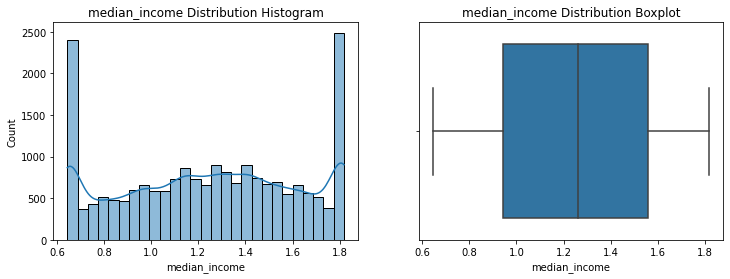

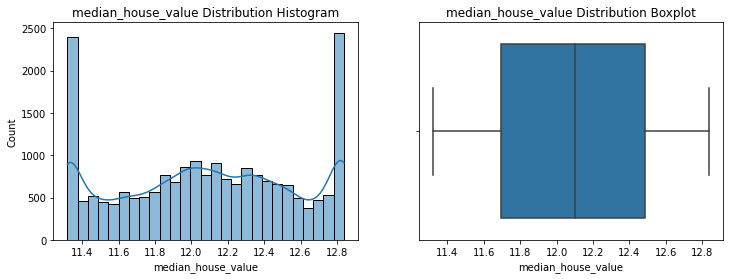

In [17]:
# memplot data yang telah berhasil memalalui tahap pembersihan 
for num in num_var:
  num_dist(housing, num)

In [18]:
# mendeklarasikan variable
x = housing.drop("median_house_value",axis=1)
Y = housing[['median_house_value']]

In [19]:
# Kelas StandardScaler menstandarkan fitur dengan mengurangi rata-rata dan kemudian menskalakan ke varians unit.
# Ini pertama-tama membuat instance dari kelas StandardScaler, bernama "independent_scaler", dan kemudian menggunakan metode "fit_transform" untuk menstandarkan data. 
# Metode "fit_transform" menyesuaikan StandardScaler dengan data dan kemudian menerapkan transformasi ke data.
# Baris terakhir adalah mencetak 5 elemen pertama dari data yang diubah.
independent_scaler = StandardScaler()
X_scaled = independent_scaler.fit_transform(x)
print(X_scaled[0,5:])

[-1.62573575 -1.6194315   1.51323811  1.2910888 ]


In [20]:
X_scaled

array([[-1.32783522,  1.05254828,  0.98214266, ..., -1.6194315 ,
         1.51323811,  1.2910888 ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.57731823,
         1.51323811,  1.2910888 ],
       [-1.33282653,  1.03850269,  1.85618152, ..., -1.6194315 ,
         1.51323811,  1.2910888 ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.11615787,
        -1.5965484 , -0.11673923],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.32121817,
        -1.5965484 , -0.11673923],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.52610175,
        -0.99568451, -0.11673923]])

In [21]:
df_scale = pd.DataFrame(X_scaled)
columns = ['longitude',	'latitude',	'housing_median_age',	'total_rooms',	'total_bedrooms',	'population',	'households',	'median_income', 'ocean_proximity']
df_scale.columns = columns

df_scale['median_house_value'] = Y
df_scale

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-1.327835,1.052548,0.982143,-1.621419,-1.595491,-1.625736,-1.619432,1.513238,1.291089,12.838939
1,-1.322844,1.043185,-0.607019,1.568947,1.594004,1.440229,1.577318,1.513238,1.291089,12.789684
2,-1.332827,1.038503,1.856182,-0.734922,-1.595491,-1.625736,-1.619432,1.513238,1.291089,12.771671
3,-1.337818,1.038503,1.856182,-1.016541,-1.258265,-1.447726,-1.266279,1.281440,1.291089,12.740517
4,-1.337818,1.038503,1.856182,-0.528251,-0.902943,-1.423054,-0.926065,0.266081,1.291089,12.743151
...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.482158,-0.315891,-0.626475,-0.434746,-1.596548,-0.116739,11.318126
20636,-0.818722,1.806329,-0.845393,-1.621419,-1.595491,-1.625736,-1.619432,-0.815445,-0.116739,11.318126
20637,-0.823713,1.778237,-0.924851,0.122536,0.211185,-0.279365,0.116158,-1.596548,-0.116739,11.432799
20638,-0.873626,1.778237,-0.845393,-0.261046,-0.134463,-0.886392,-0.321218,-1.596548,-0.116739,11.346871


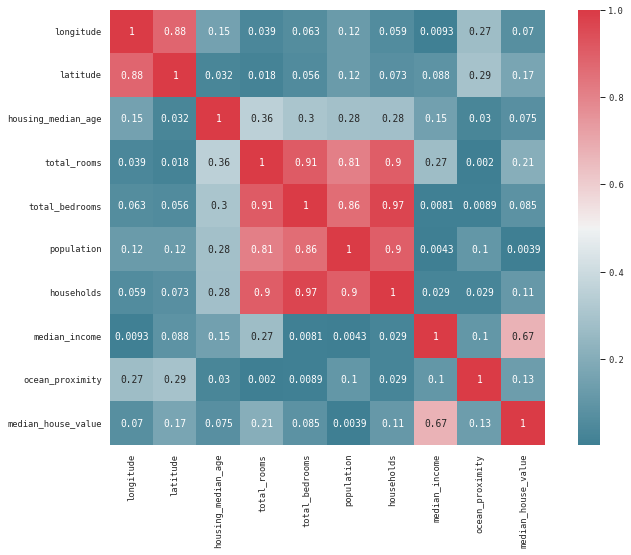

In [22]:
#heatmap menggunakan seaborn
#mengatur konteks untuk plotting 
#didalam heatmap dibawah ini tidak terdapat nilai linier regresi code dibawah juga hanya menampilkan matriks korelasi antar fitur dalam  data frame
#nilai linier regresi adalah suatu model statistik yang dugunakan untuk mempelajari hubungan antara variabel  dan satu atau lebih variabel bebas (independent)
# Tujuan dari regresi adalah untuk membangun suatu model matematis yang dapat memprediksi nilai variabel terikat berdasarkan nilai-nilai variabel bebas.
sns.set(context="paper",font="monospace")
housing_corr_matrix = df_scale.corr(method='spearman').abs()
#mengatur size
fig, axe = plt.subplots(figsize=(12,8))
#warna
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)
#gambar heatmap
sns.heatmap(housing_corr_matrix,vmax=1,square =True, cmap=cmap,annot=True );

In [23]:
X_new = df_scale.drop(columns=['median_house_value'], axis=1)
y_new = df_scale[['median_house_value']]

In [41]:
# from sklearn.model_selection import GridSearchCV
# # Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }
# # Create a based model
# rf = RandomForestRegressor(random_state=42)
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 2, n_jobs = 1, verbose = 3, scoring = 'neg_mean_squared_error')

In [26]:
# grid_search.fit(X_train, y_train)

In [27]:
#print(grid_search.best_params_)
# best_grid = grid_search.best_estimator_
# print(best_grid)

In [38]:
# Kode ini menggunakan fungsi "train_test_split" dari pustaka scikit-learn untuk membagi data dalam variabel "X_new" dan "y_new" menjadi set pelatihan dan pengujian. Fungsinya 
# adalah membagi data menjadi rasio 80:20, dengan 80% data digunakan untuk pelatihan dan 20% data digunakan untuk pengujian. Parameter "test_size" diatur ke 0, 2, menentukan bahwa 20% dari data harus digunakan untuk pengujian.
# Kode ini menggunakan fungsi "train_test_split" dari pustaka scikit-learn untuk membagi data dalam variabel "X_new" dan "y_new" menjadi set pelatihan dan pengujian. Fungsinya 
# adalah membagi data menjadi rasio 80:20, dengan 80% data digunakan untuk pelatihan dan 20% data digunakan untuk pengujian. Parameter "test_size" diatur ke 0, 2, menentukan bahwa 20% dari data harus digunakan untuk pengujian.
# random state digunakkan untuk mengambil sampel acak dari fitur dan sampel yang digunakan untuk membangun pohon,  Ketika yang sama random_statedigunakan, model akan menghasilkan pohon yang sama dan hasil yang sama, meskipun data pelatihannya berbeda.
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.2,random_state=42)
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))  
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

y_test shape (4128, 1) and size 4128


# **IMPLEMENTASI RANDOM FOREST REGRESSOR**

Random Forest Regressor adalah metode pembelajaran mesin yang digunakan untuk memprediksi nilai numerik (regresi). Ini menggunakan teknik ensemble learning, yang artinya menggabungkan beberapa model pembelajaran mesin untuk membuat satu model akhir yang lebih baik. Dalam hal ini, model-model yang digabungkan adalah pohon keputusan, dan proses pembuatan model disebut sebagai "pembuatan hutan acak". Prosesnya adalah dengan menggunakan beberapa pohon keputusan yang dibangun menggunakan subset acak dari data latih dan fitur-fitur yang diambil secara acak. Kemudian, hasil dari setiap pohon digabungkan untuk membuat prediksi akhir.

In [28]:
rfReg= RandomForestRegressor(n_estimators=100)
rfReg.fit(X_train, y_train)
predictions = rfReg.predict(X_test)

<ipython-input-28-663bde1e4eea>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfReg.fit(X_train, y_train)


In [29]:
pred = rfReg.predict(X_test)

Kode ini mendefinisikan fungsi yang disebut "metrik" yang mengambil dua argumen: "y_test" dan "pred" (yang merupakan nilai sebenarnya dari variabel dependen dan nilai prediksi dari variabel dependen, masing-masing). Fungsi ini pertama-tama menghitung tiga metrik kinerja untuk model: R-squared, mean squared error (MSE), dan mean absolute percentage error (MAPE). Nilai R-kuadrat berkisar antara 0 dan 1, dengan 1 menunjukkan kecocokan yang sempurna. Semakin rendah kesalahan kuadrat rata-rata, semakin baik modelnya. Rata-rata kesalahan persentase absolut (MAPE) adalah perbedaan persentase antara nilai aktual dan prediksi.

Kemudian mencetak nilai dari ketiga metrik ini, dan memplot diagram batang dengan tiga metrik sebagai sumbu x, dan nilai metrik sebagai sumbu y. Warna batang dalam plot adalah biru untuk R-kuadrat, oranye untuk UMK dan hijau untuk MAPE. Juga, ini menunjukkan tambalan label untuk setiap metrik. Akhirnya, fungsi menunjukkan plot menggunakan fungsi show() dari perpustakaan matplotlib.

Fungsi ini dapat digunakan untuk mengevaluasi kinerja model dan membandingkannya dengan model lain.

The r-squared score of the model is  0.8390263928949525
The mean squared error is 0.19545861781905036
mean absolute error score is 0.134624153920309
The Mean absolute percentage error is 0.011131324497026923


<ipython-input-30-d2aa1daeff16>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend([xlabel], handles=[r2_label, mse_label, mae_label, mape_label])


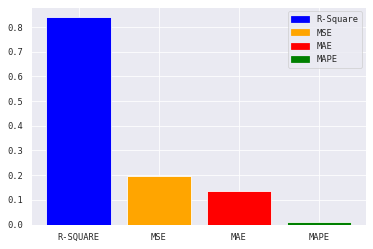

In [30]:
# Function for estimating r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import  r2_score,mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
from math import sqrt
import matplotlib.patches as mpatches 
def metrics(y_test, pred):
    r2 = r2_score(y_test,pred)
    mse = sqrt(mean_squared_error(y_test,pred))
    mae = mean_absolute_error(y_test,pred)
    mape = mean_absolute_percentage_error(y_test,pred)
    print('The r-squared score of the model is ',r2)
    print('The mean squared error is',mse)
    print('mean absolute error score is',mae)
    print('The Mean absolute percentage error is',mape)
    xlabel = ['R-SQUARE', 'MSE', 'MAE', 'MAPE']
    ylabel = [r2, mse, mae, mape]
    plt.bar(xlabel, ylabel, color=['blue', 'orange', 'red', 'green'])
    r2_label = mpatches.Patch(color='blue', label='R-Square')
    mse_label = mpatches.Patch(color='orange', label='MSE')
    mae_label = mpatches.Patch(color='red', label='MAE')
    mape_label = mpatches.Patch(color='green', label='MAPE')
    plt.legend([xlabel], handles=[r2_label, mse_label, mae_label, mape_label])
    plt.show()
metrics(y_test,pred)

In [31]:
y_test=y_test.reset_index()
y_test=y_test.drop(columns=['index'], axis = 1)

In [32]:
pred = pd.DataFrame(pred, columns=['pred'])

In [33]:
pred['Actual']=y_test

In [34]:
df_results = pd.DataFrame({'Actual': pred.Actual, 'Predicted': pred.pred})

In [35]:
df_results

,Actual,Predicted
0,11.318126,11.318126
1,11.318126,11.353529
2,12.838939,12.817471
3,12.294999,12.476947
4,12.535376,12.349890
...,...,...
4123,12.481049,12.299073
4124,12.494255,12.399335
4125,12.838939,12.827716
4126,11.318126,11.327765


<ipython-input-36-0d9f51a2cf74>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(pred, y_test)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Predicted
Feature names seen at fit time, yet now missing:
- pred

  warnings.warn(message, FutureWarning)


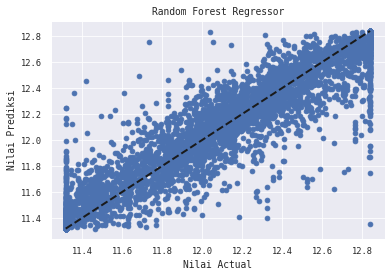

In [36]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Latih model
regressor = RandomForestRegressor()
regressor.fit(pred, y_test)

# Prediksi data test
y_pred = regressor.predict(df_results)

# Buat scatter plot
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Nilai Actual")
plt.ylabel("Nilai Prediksi")
plt.title("Random Forest Regressor")
plt.show()